# Importing important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv')

# Data Preparation

In [ ]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
data.shape

(113937, 81)

Out of all the 81 columns, selecting only 15 columns to work on. These columns are related to the amount of loan, dates, rates and other charactrestics about the borrowers.

In [ ]:
df_data = data.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]
df_data

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663000000,36,Current,NaN,0.22354,0.1864,0.1764,C,5.0,1,...,Employed,0.0,"$50,000-74,999",4333.333333,0,10000,2013-04-22 00:00:00,364.74,-75.58,1
113933,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,A,8.0,7,...,Employed,5062.0,"$75,000-99,999",8041.666667,0,2000,2011-11-07 00:00:00,65.57,-30.05,22
113934,2013-12-13 05:49:12.703000000,60,Current,NaN,0.23984,0.2150,0.2050,D,3.0,1,...,Employed,0.0,"$25,000-49,999",2875.000000,0,10000,2013-12-23 00:00:00,273.35,-16.91,119
113935,2011-11-14 13:18:26.597000000,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,C,5.0,2,...,Full-time,0.0,"$25,000-49,999",3875.000000,0,15000,2011-11-21 00:00:00,449.55,-235.05,274


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

In [ ]:
df_data.duplicated().sum()

0

# Data Cleaning

In [ ]:
df_data.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64

In [ ]:
#adjusting the datetime columns.
df_data['ListingCreationDate'] = pd.to_datetime(df_data['ListingCreationDate'])
df_data['ClosedDate'] = pd.to_datetime(df_data['ClosedDate'])
df_data['LoanOriginationDate'] = pd.to_datetime(df_data['LoanOriginationDate'])

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   object        
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  int64         
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  object  

Converting the Income Range and Prosper Rating to Ordinate Categorical Data for doing Feature Engineering in future

In [ ]:
original = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in original:
  ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = original[var])
  df_data[var] = df_data[var].astype(ordered_var)

In [ ]:
df_data['ProsperRating (Alpha)'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [ ]:
df_data['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

Now converting the datatype of categorical columns as category

In [ ]:
df_data['Occupation'] = df_data['Occupation'].astype('category')
df_data['BorrowerRate'] = df_data['BorrowerRate'].astype('category')
df_data['LoanStatus'] = df_data['LoanStatus'].astype('category')
df_data['ListingCategory (numeric)'] = df_data['ListingCategory (numeric)'].astype('category')
df_data['EmploymentStatus'] = df_data['EmploymentStatus'].astype('category')

In [ ]:
df_data['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [ ]:
df_data.shape

(113937, 22)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  category      
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   category      
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  category

The small dataset of 22 columns has numeric as well as categorical data. 

There are some important features including:

BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or * lowest risk score. Applicable for loans originated after July 2009.

LoanOriginationDate: The date the loan was originated.

LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that Loan Status and Employment Status will have a strong impact on loan and the features we are trying to explor. Also the Monthly Income will play a role here and the Term (lenght of the loan) may have an effect. SO I will try to invistigate these more.

# EDA: Exploratory Data Analysis

**Univariate Analysis** on the most important features: Borrower APR , Prosper Score and Loan Original Amount

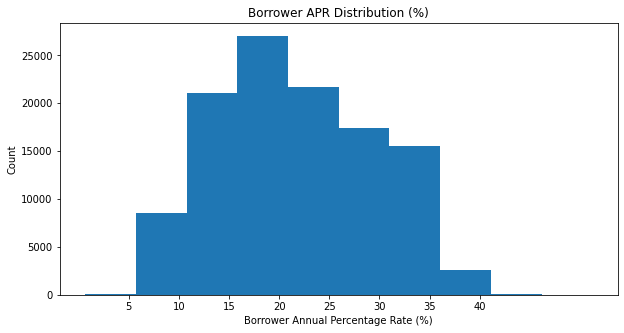

In [ ]:
borrowe_APR_percentage = df_data['BorrowerAPR']*100

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = 10)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()


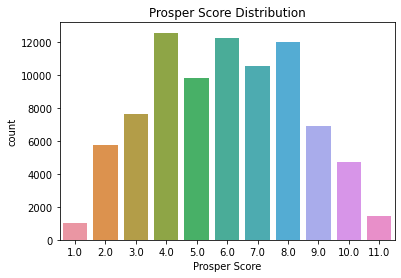

In [ ]:
sns.countplot(data=df_data, x= 'ProsperScore', color= None)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

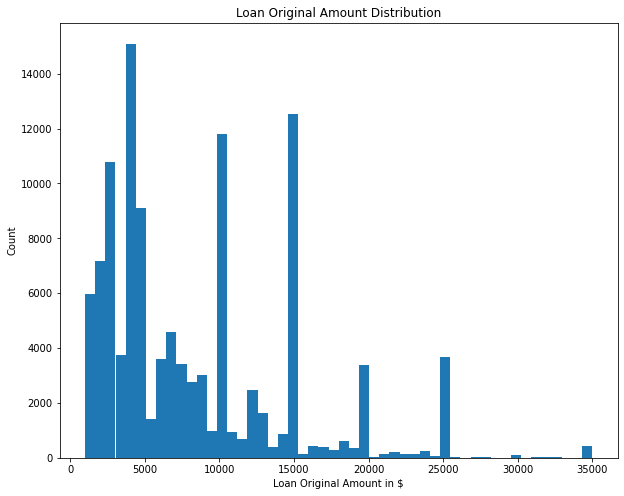

In [ ]:
plt.figure(figsize=[10, 8])
plt.hist(data = df_data, x = 'LoanOriginalAmount', bins = 50)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()


**What I understood from this Univariate Analysis:** 



*   Borrower APR Distribution: The data is normally distributed and the peak values are from 15 to 20% with a spike at 35%

*   Prosper Scores : The prosper scores are normally distributed and the values at 4 , 6 and 8 are the most common.

* Loan Original Amount: The data is skewed with a tail.



In [ ]:
df_data['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Text(0.5, 0, 'Term (Months)')

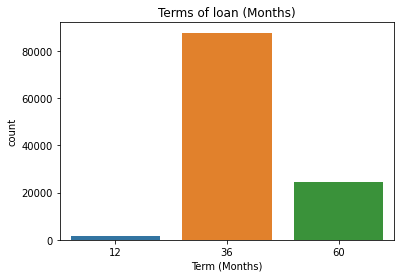

In [ ]:
sns.countplot(data=df_data,x= 'Term',color=None);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)')

Inference: We see that the most values are in 36 months

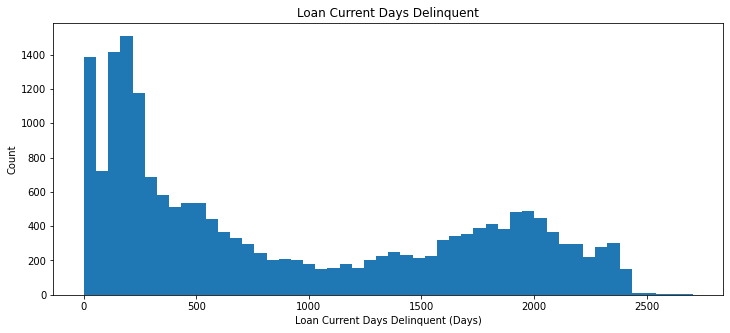

In [ ]:
plt.figure(figsize=[12, 5])
plt.hist(data = df_data[df_data['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = 50)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Prosper Rating Distribution')

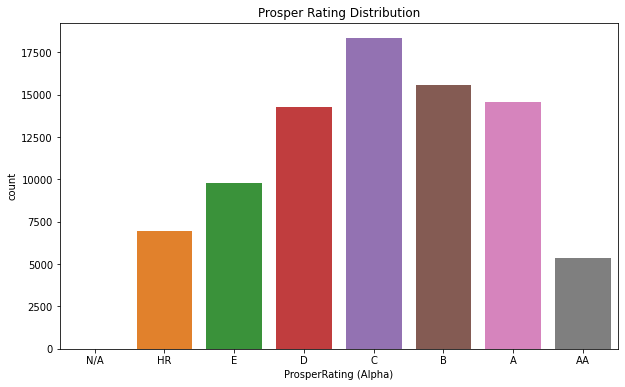

In [ ]:
plt.figure(figsize=[10, 6]);
sns.countplot(data=df_data,x='ProsperRating (Alpha)',color=None)
plt.title('Prosper Rating Distribution')

**Inference:** Most borrowers get a Prosper Rating of 'C'

Text(0.5, 0, 'Status')

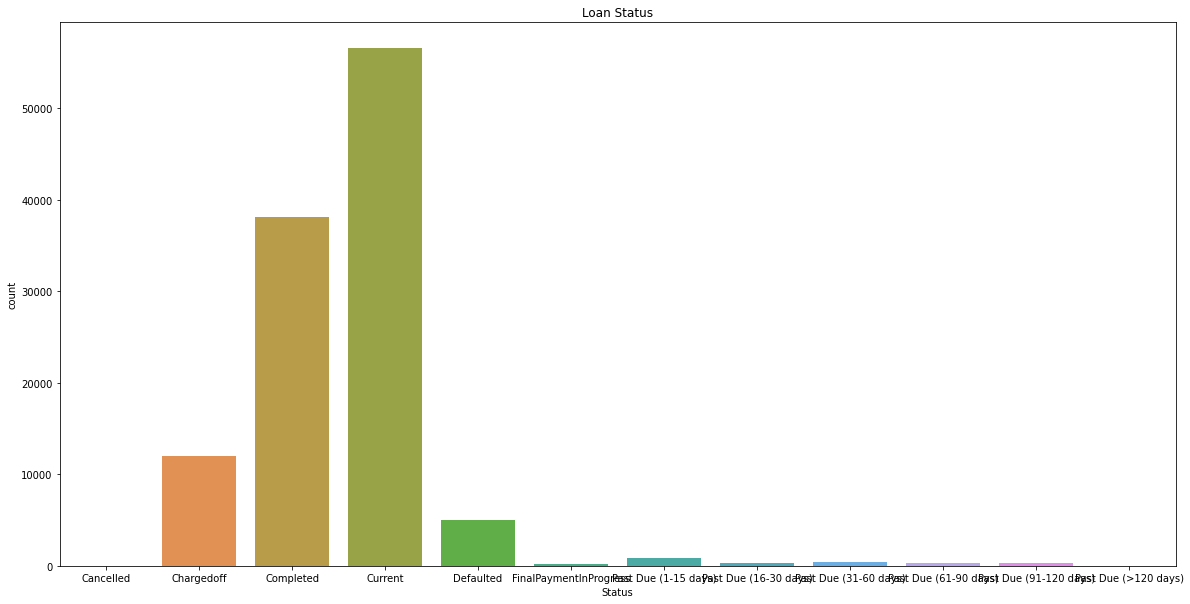

In [ ]:
plt.figure(figsize=(20,10))

sns.countplot(data=df_data,x= 'LoanStatus',color=None)
plt.title('Loan Status')
plt.xlabel('Status')

Text(0.5, 0, 'Rating')

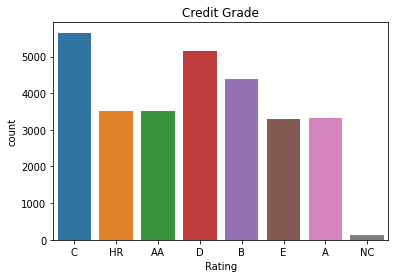

In [ ]:
sns.countplot(data=data,x= 'CreditGrade',color=None);
plt.title('Credit Grade')
plt.xlabel('Rating')

Inference: The most number of Borrowers Credit Grade is C , followed by D and B.

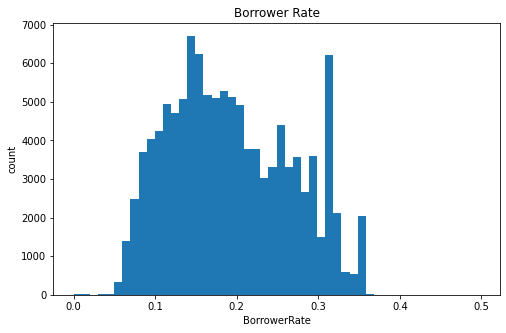

In [ ]:
plt.figure(figsize=[8, 5])
plt.hist(data = df_data, x = 'BorrowerRate', bins = 50)
plt.xlabel('BorrowerRate')
plt.ylabel('count')
plt.title('Borrower Rate')
plt.show()

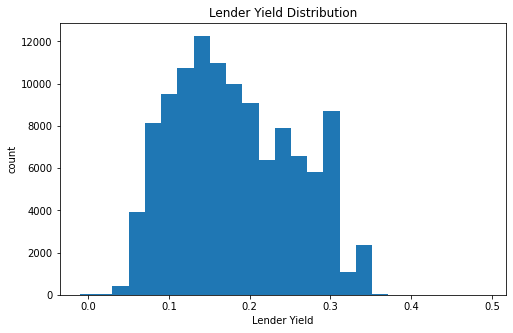

In [ ]:
plt.figure(figsize=[8, 5])
plt.hist(data = df_data, x = 'LenderYield', bins = 25)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()


**Bivariate Analysis**

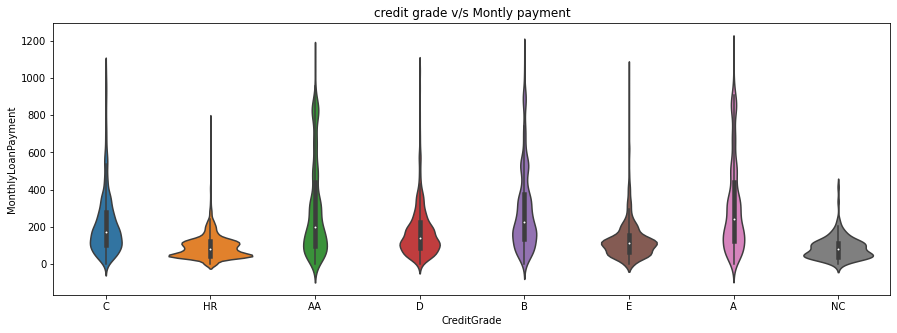

In [ ]:
plt.figure(figsize = [15, 5])
sns.violinplot(data=data,x='CreditGrade', y='MonthlyLoanPayment',color=None);
plt.title('credit grade v/s Montly payment')
plt.xlabel('CreditGrade');
plt.ylabel('MonthlyLoanPayment');

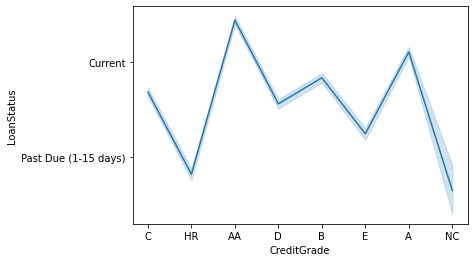

In [ ]:
plt.figsize=(16,16)
sns.lineplot(data=data,x='CreditGrade',y='LoanStatus',hue=None,markers=None, style_order=None)
plt.show()

**MultiVariate Relations:**

**Research Questions:**

1. Most number of borrowers of Credit Grade : C , D followed by A

2. 

3. Highest number of Borrower Rate: Between 0.1 and 0.2

4. Does the highest number of LenderYeild is between 0.1 and 0.2? YES

5. Is the Credit Grade really accurate? YES. The higher credit grade leads to higher Monthly Loan Payment.

6. Accuarcy of Credit Grade as of Loan Status : It can be seen in the graph that it is highly accurate.

7.